<a href="https://colab.research.google.com/github/Pragati-Patel-pp/Basics-for-Experimental-HEP/blob/master/Calculation%20of%20invariant%20mass%20of%20dimuon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**How to save this notebook to your personal Drive**

To copy this notebook to your Google Drive, go to File and select "Save a copy in Drive", where it will automatically open the copy in a new tab for you to work in. This notebook will be saved into a folder on your personal Drive called "Colab Notebooks".


Still stumped? Check out <a href="https://www.youtube.com/watch?v=qaJ2UpMPXKk"> this video</a> for help

# Looking at the dimuon spectrum over a wide energy range

<h3>Learning goals</h3>
<ul>
    <li>Relativistic kinematics.
    <li>Mesons.
</ul>

<b>Background</b>

To determine the mass ($m$) of a particle you need to know the 4-momenta of the particles ($\mathbf{P}$) that are detected after the collision: the energy ($E$), the momentum in the x direction ($p_x$), the momentum in the y direction ($p_y$), the momentum in the z direction ($p_z$).

$$\mathbf{P} = (E,p_x,p_y,p_z)$$


\begin{equation*} m = \sqrt{E^2-(p_x^2+p_y^2 + p_z^2)} \end{equation*}

Some particles are very unstable and decay (turn into) to two or more other particles. In fact, they can decay so quickly, that they never interact with your detector! Yikes!

However, we can reconstruct the parent particle (sometimes referred to as <b>the initial state particle</b>) and its 4-momentum by adding the 4-momenta of the child particles (sometimes referred to as <b>the decay products</b>). 

$$\mathbf{P_{\rm parent}} = \mathbf{P_{\rm child 0}} + \mathbf{P_{\rm child 1}} + \mathbf{P_{\rm child 2}} + ...$$



which breaks down into...

$$E_{\rm parent} = E_{\rm child 0} + E_{\rm child 1} + E_{\rm child 2} + ...$$

$$p_{\rm x parent} = p_{\rm x child 0} + p_{\rm x child 1} + p_{\rm x child 2} + ...$$

$$p_{\rm y parent} = p_{\rm y child 0} + p_{\rm y child 1} + p_{\rm y child 2} + ...$$

$$p_{\rm z parent} = p_{\rm z child 0} + p_{\rm y child 1} + p_{\rm z child 2} + ...$$


<b>Let's code!</b>

Here is some very, very basic starter code. It reads in data from the CMS experiment. 

If you haven't already, you will want to go through the <a href="https://colab.research.google.com/drive/1TFvNoq-i8isZoAwnZubRnNM0CrMGXUmP">CMS data model</a> (also included when you cloned this directory) exercise so you know how to pull out the relevant information. 

The following example runs with 1000 events that are included with this repository. To better see the full phyiscs, you can download a bigger file, <code>dimuons_100k.dat</code>. To download this file, see the <a href="https://colab.research.google.com/drive/174AUxy9qTqQ1XndbJW_Wryz9m95QZRIk">download_more_data</a> exercise, also included in this repository.

<b>NOTE: If you are getting an error saying that there is no module "pps_tools", go to Runtime, and then select Restart runtime. Also make sure that your runtime type is Python 3. </b>

In [1]:
###### This cell need only be run once per session ##############
###### Make sure your runtime type is Python 3 #########

# Import h5hep from Github. This is to allow us to read these
# particular files. 
!pip install git+https://github.com/mattbellis/h5hep.git

# Import custom tools package from Github. These are some simple accessor functions
# to make it easier to work with these data files. 
!pip install git+https://github.com/mattbellis/particle_physics_simplified.git

import pps_tools as pps
import h5hep
import numpy as np
import matplotlib.pyplot as plt


  Cloning https://github.com/mattbellis/h5hep.git to /tmp/pip-req-build-e71cukmd
  Running command git clone -q https://github.com/mattbellis/h5hep.git /tmp/pip-req-build-e71cukmd
  Created wheel for h5hep: filename=h5hep-0.9-cp36-none-any.whl size=19385 sha256=54537e4fae2353cbfa9cc2811c6450b95aa28db86c03a0c1755daebf8ca1f28d
  Stored in directory: /tmp/pip-ephem-wheel-cache-b2hgmlrn/wheels/1b/5b/88/a70717ae86e789eccefe91a5f3d068353d7dd93a372da84014
Successfully built h5hep
  Cloning https://github.com/mattbellis/particle_physics_simplified.git to /tmp/pip-req-build-bkitc0l6
  Running command git clone -q https://github.com/mattbellis/particle_physics_simplified.git /tmp/pip-req-build-bkitc0l6
  Created wheel for particle-physics-simplified: filename=particle_physics_simplified-0.9-cp36-none-any.whl size=31257 sha256=3c12bfeec5a7ae6b630eb0e6213abe137f12a1f4e997bfa6a3681d53c68540dc
  Stored in directory: /tmp/pip-ephem-wheel-cache-g7a3yq0v/wheels/1a/aa/e5/a3256c3dc3cbdff623e6512edecdf9d8

In [2]:
###### This cell need only be run once per session ############################

# Fetch data file
pps.download_from_drive('dimuons_100k.hdf5')

In [3]:
# open and read data file
infile = 'data/dimuons_100k.hdf5'

collisions = pps.get_collisions(infile,experiment='CMS',verbose=False)


Building a simplified interface to the events...

Building the indices...
Built the indices!
Data is read in and input file is closed.
Reading in event  0
Reading in event  10000
Reading in event  20000
Reading in event  30000
Reading in event  40000
Reading in event  50000
Reading in event  60000
Reading in event  70000
Reading in event  80000
Reading in event  90000


<h2><font color="red">Challenge!</font></h2>

Use the sample code to find the mass of the particle that the two muons came from (parent particle). 

To do this, you will need to loop over all pairs of muons for each collision, sum their 4-momenta (energy, px, py, and pz) and then use that to calculate the invariant mass. 

Do this for all possible pairs and in addition, break it down so that you calculate the invariant mass for the cases where:
* Both muons are positively charged.
* Both muons are negatively charged.
* The muons have opposite charges.

Be careful. Some collisions may have more than 2 muons, so write your code such that it calculates all possible pairs of muons in a given collisions. For example, if there are 3 muons in a collision, there are 3 possible pairs that you can make. 

<i>Hint!</i>

It is very likely that a particle exists where there is a peak in the data. However, this is not always true. 
A peak in the data is most likely the mass of a particle. You can look at the approximate mass to figure out which particle 
is found in the data.

Your histogram should look something like the following sketch. The value of the peaks should be the mass of a particle. You should be able to find two particles in their ground state. <a href="http://en.wikipedia.org/wiki/J/psi_meson">Check your answer for the first particle!</a> <a href="http://en.wikipedia.org/wiki/Upsilon_meson">Check your answer for the second particle!</a> 

In [4]:
from IPython.display import Image
Image(url='https://raw.githubusercontent.com/particle-physics-playground/playground/master/activities/images/dimuons_sketch.jpeg')

(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.6520e+03,
        7.3540e+03, 6.0380e+03, 1.2619e+04, 3.3700e+03, 2.3590e+03,
        1.9670e+03, 1.8080e+03, 1.7890e+03, 1.7970e+03, 1.8060e+03,
        1.8550e+03, 1.9540e+03, 1.9030e+03, 2.0310e+03, 2.0500e+03,
        2.0100e+03, 1.9700e+03, 3.3200e+03, 2.2910e+03, 2.1880e+03,
        1.9180e+03, 1.7860e+03, 1.7220e+03, 1.6120e+03, 1.5420e+03,
        1.4710e+03, 1.3960e+03, 1.3180e+03, 1.2100e+03, 1.2090e+03,
        1.1340e+03, 1.0840e+03, 9.9300e+02, 9.7100e+02, 9.2100e+02,
        8.5600e+02, 7.8100e+02, 7.3300e+02, 7.4000e+02, 6.6500e+02,
        5.7600e+02, 6.4400e+02, 5.6700e+02, 5.6500e+02, 5.0600e+02,
        4.7200e+02, 4.7300e+02, 4.3300e+02, 4.2100e+02, 3.8000e+02,
        3.6300e+02, 3.0300e+02, 2.6600e+02, 3.0000e+02, 2.7800e+02,
        2.7400e+02, 2.3300e+02, 2.0900e+02, 2.1900e+02, 1.7800e+02,
        1.8700e+02, 1.4900e+02, 1.7900e+02, 1.5600e+02, 1.7700e+02,
        1.3800e+02, 1.2000e+02, 1.2100e+02, 1.20

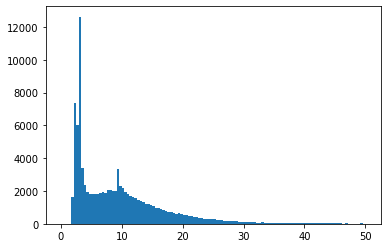

In [5]:
E = 0
Px = 0
Py =0
Pz = 0
mass = [] #list for storing invarient mass for all muon pairs.
mass_p = [] #list for storing invarient mass when both muons are positively charged.
mass_n = [] #list for storing invarient mass when both muons are negatively charged.
mass_o = [] #list for storing invarient mass when both muons have opposite charge.
for collision in collisions:

  muon = collision['muons'] #all muon in a collision
  
  n = len(muon) # number of muons in collision
  for i in range(n): #loop for pairing 2 muons only out of n muons
    for j in range(i+1,n):
      E = muon[i]['e']+muon[j]['e']
      Px = muon[i]['px'] + muon[j]['px']
      Py = muon[i]['py'] + muon[j]['py'] 
      Pz = muon[i]['pz'] + muon[j]['pz']
      m = np.sqrt(E*E-Px*Px-Py*Py-Pz*Pz)
      mass.append(m)
      if (muon[i]['q']==1 and muon[j]['q']==1): #loop for pairing 2 muons only out of n muons when both have positive charge.
        E = muon[i]['e']+muon[j]['e']
        Px = muon[i]['px'] + muon[j]['px']
        Py = muon[i]['py'] + muon[j]['py'] 
        Pz = muon[i]['pz'] + muon[j]['pz']
        m = np.sqrt(E*E-Px*Px-Py*Py-Pz*Pz)
        mass_p.append(m)
      elif (muon[i]['q']==-1 and muon[j]['q']==-1): #loop for pairing 2 muons only out of n muons when both have negative charge.
        E = muon[i]['e']+muon[j]['e']
        Px = muon[i]['px'] + muon[j]['px']
        Py = muon[i]['py'] + muon[j]['py'] 
        Pz = muon[i]['pz'] + muon[j]['pz']
        m = np.sqrt(E*E-Px*Px-Py*Py-Pz*Pz)
        mass_n.append(m)
      else: #loop for pairing 2 muons only out of n muons when both have opposite charge.
        E = muon[i]['e']+muon[j]['e']
        Px = muon[i]['px'] + muon[j]['px']
        Py = muon[i]['py'] + muon[j]['py'] 
        Pz = muon[i]['pz'] + muon[j]['pz']
        m = np.sqrt(E*E-Px*Px-Py*Py-Pz*Pz)
        mass_o.append(m)
plt.hist(mass, bins=120, range=(0,50)) #plotting histogram of all dimuon pair invarient mass
#plt.hist(mass_p, bins=120, range=(0,50)) 
#plt.hist(mass_n, bins=120, range=(0,50))
#plt.hist(mass_o, bins=120, range=(0,50))

#### Comments

Depending on which file you ran over, you may see hints of particles below 20 GeV/c$^2$. It is possible you see signs of other particles at even higher energies. Plot your masses over a wide range of values, but then zoom in (change the plotting range) on different mass ranges to see if you can identify these particles.  

(array([ 489.,  493.,  471.,  506.,  497.,  476.,  445.,  473.,  410.,
         432.,  439.,  447.,  414.,  474.,  445.,  407.,  454.,  408.,
         431.,  384.,  382.,  373.,  401.,  353.,  396.,  365.,  336.,
         392.,  351.,  388.,  341.,  336.,  335.,  366.,  338.,  352.,
         353.,  323.,  356.,  415.,  559.,  871., 1754., 2606., 2286.,
        1101.,  563.,  358.,  291.,  257.,  233.,  252.,  207.,  212.,
         217.,  198.,  212.,  181.,  182.,  175.,  200.,  186.,  170.,
         202.,  198.,  203.,  236.,  253.,  228.,  184.,  168.,  152.,
         146.,  154.,  151.,  161.,  132.,  143.,  134.,  104.,  146.,
         128.,  146.,  133.,  134.,  143.,  128.,  126.,  109.,  141.,
         129.,  114.,  102.,  119.,  137.,  105.,  105.,  101.,  115.,
         119.,  122.,  121.,  125.,  106.,  106.,  118.,   98.,  105.,
         131.,  101.,  106.,   99.,   99.,  108.,  116.,  107.,  108.,
         119.,   98.,  117.]),
 array([2.   , 2.025, 2.05 , 2.075, 2.1  , 2.1

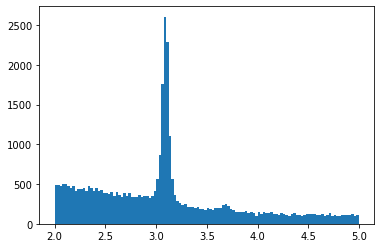

In [10]:
plt.hist(mass, bins=120, range=(2,5)) #particel is J/psi(ccbar) of mass 3.09 GeV

(array([120., 140., 133., 124., 109., 120., 125., 127., 124., 132., 100.,
         93., 135., 124., 135., 104., 127., 128., 110., 115., 115., 124.,
        122., 141., 107., 135., 126., 100., 115., 123., 103., 122., 106.,
        128., 111., 129., 130., 101., 112., 128., 115., 130., 134.,  98.,
        137., 108., 113., 140., 128., 136., 123., 151., 172., 203., 231.,
        242., 259., 288., 257., 248., 253., 209., 174., 179., 159., 141.,
        124., 142., 132., 140., 112., 133., 115., 126., 129., 137., 145.,
        146., 144., 158., 142., 156., 149., 127., 127., 119., 129., 129.,
        132., 127., 119., 126., 124., 128., 130., 139., 127., 139., 119.,
        119., 123., 128., 108.,  98., 100., 106., 110., 121., 129., 113.,
        109., 104., 126.,  90., 102.,  99., 123., 108., 106.,  97.]),
 array([ 8.   ,  8.025,  8.05 ,  8.075,  8.1  ,  8.125,  8.15 ,  8.175,
         8.2  ,  8.225,  8.25 ,  8.275,  8.3  ,  8.325,  8.35 ,  8.375,
         8.4  ,  8.425,  8.45 ,  8.475,  8.5  

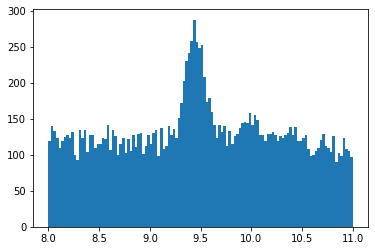

In [13]:
plt.hist(mass, bins=120, range=(8,11)) #particel is upsilon(bbbar) of mass 9.46 GeV